<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/Predicting_customer_ad_clicks_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('/content/ad.csv')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


From above we can see that the area income column contains different segments of people based on their income group. This signifies that people belong to different economic classes.

Also we can see that there are no outliers in the dataset in oother columns.

EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


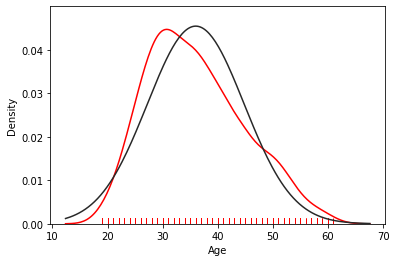

In [10]:
from scipy.stats import norm
sns.distplot(df['Age'], hist=False, color='r', rug=True, fit=norm);

The data is nearly normally distributed therefore we don't need any type of preprocessing

Some more exploratory data analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


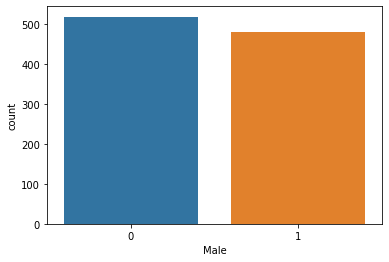

In [20]:
sns.countplot(df.Male)

We can see that the sex ratio is nearly similar in the dataset therefore the same proportion of female viewers are there compared with males

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2064: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


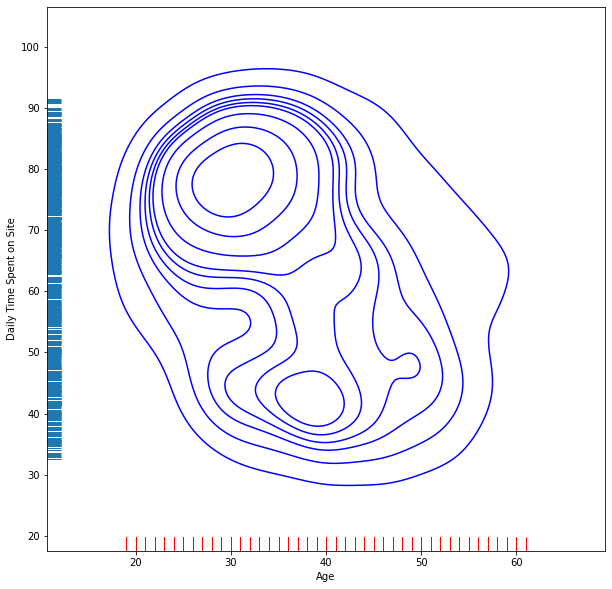

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.Age, df['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(df.Age, color="r", ax=ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical=True, ax=ax)

Above graph shows that the middle aged group of people are the target ones who spend maximum time on the website for viewing aadvertisements and therefore the engagement should be centered around this group of people only.

Plotting a heatmap to see the correlation between different independent and dependent variable. High correlation means keeping the independent variable wrt dependent one and low correlation will lead to discarding of the variable

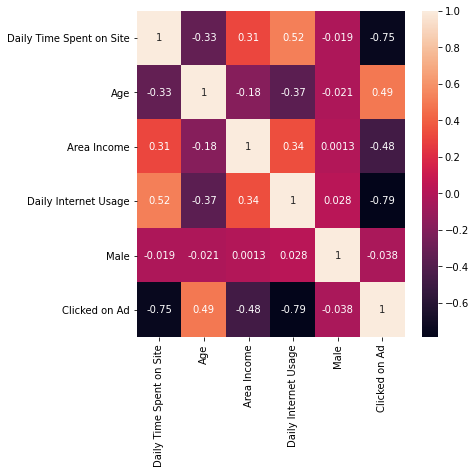

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

Above we can see that nearly all the variables are highly correlated with the target variable except the Male column.

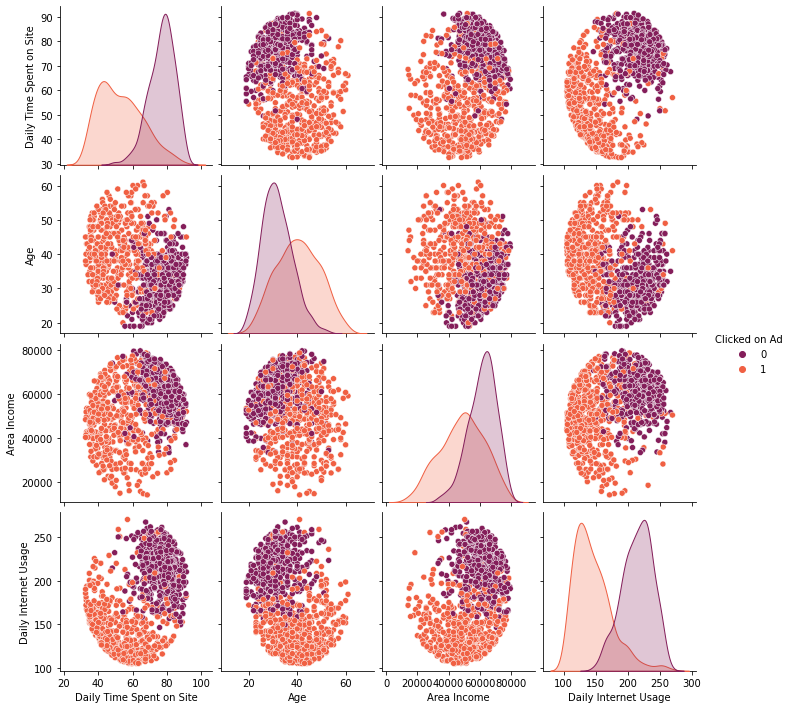

In [50]:
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


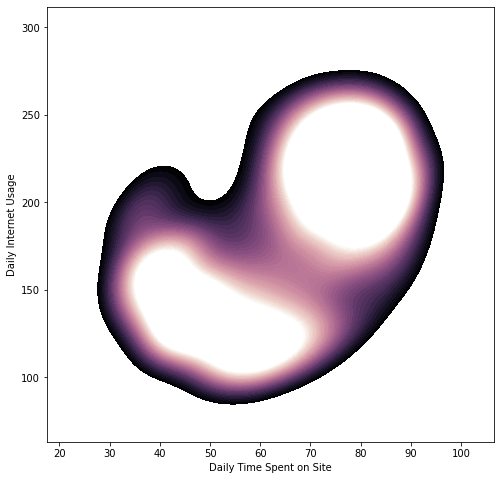

In [25]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(df["Daily Time Spent on Site"], df['Daily Internet Usage'],
    cmap=cmap, n_levels=100, shade=True);


Above it can be seen that time spent on site is positively correlated with daily internet usage which means that people who spend more time on the site are the ones who use internet daily

In [30]:
pd.crosstab(index=df['Country'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


Above we can see the top 10 countries in the dataset where maximum people are populated as per the data

In [27]:
data = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

In [28]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0


In [29]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


Getting our training and testing data for feeding it to the machine learning model

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X= data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]

In [34]:
y= y = data['Clicked on Ad']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
models = [('Logistic Regression', LogisticRegression(max_iter=500)),('Random Forest', RandomForestClassifier()),
          ('Linear SVC', LinearSVC()), ('SGD Classifier', SGDClassifier())]

In [43]:
names = []
results = []
model = []
for name, clf in models:
    pipe = Pipeline([(name, clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    names.append(name)
    results.append(accuracy)
    model.append(pipe)
    
    msg = "%s: %f" % (name, accuracy)
    print(msg)

Logistic Regression: 0.884000
Random Forest: 0.944000
Linear SVC: 0.520000
SGD Classifier: 0.480000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


  Above we can see that Random forest classifier has outperformed all the other classifiers so we will be using this as the benchmark model for our analysis

In [44]:
import pickle

In [45]:
filename = 'customer_ad.random_forest.sav'
pickle.dump(model[1], open(filename, 'wb'))

In [46]:
randomforest_model = pickle.load(open('customer_ad.random_forest.sav', 'rb'))

In [47]:
X.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day of the month,Day of the week
0,68.95,35,61833.90,256.09,0,3,27,6
1,80.23,31,68441.85,193.77,1,4,4,0


predicting on unseen data

In [49]:
li= [45, 22, 6548, 224, 0, 4, 28, 5]

randomforest_model.predict([li])

array([1])